**此卷积参数的可视化存在问题**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import caffe
%matplotlib inline

In [3]:
caffe_root='/home/keysen/caffe/'
os.chdir(caffe_root)
sys.path.insert(0, caffe_root+'python')

In [4]:
plt.rcParams['figure.figsize']=(8,8)
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'

In [5]:
net = caffe.Net(caffe_root + 'examples/mnist/lenet_train_test.prototxt',
                caffe_root + 'examples/mnist/lenet_iter_10000.caffemodel',
                caffe.TEST)
[(k, v[0].data.shape) for k, v in net.params.items()]

[('conv1', (50, 1, 5, 5)),
 ('conv2', (20, 50, 5, 5)),
 ('ip1', (512, 320)),
 ('ip2', (10, 512))]

In [6]:
#编写一个函数，用于显示各层的参数
def show_feature(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    print data.shape
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    print data.shape
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    print data.shape
    plt.imshow(data)
    plt.axis('off')
    plt.show()

(50, 1, 5, 5)
(64, 6, 6)
(8, 6, 8, 6)
(48, 48)


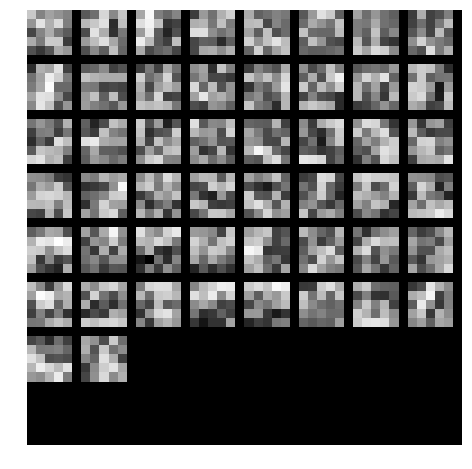

In [11]:
# 第一个卷积层，参数规模为(20,1,5,5)，即20个5*5的1通道filter
weight = net.params["conv1"][0].data
print weight.shape
show_feature(weight.reshape(weight.shape[0]*weight.shape[1], 5, 5))
# show_feature(weight.transpose(0, 2, 3, 1))

(20, 50, 5, 5)
(1024, 6, 6)
(32, 6, 32, 6)
(192, 192)


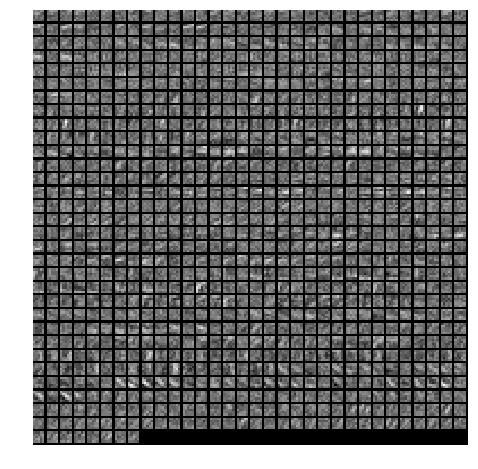

In [10]:
# 第二个卷积层的权值参数，共有50*20个filter,每个filter大小为5*5
weight = net.params["conv2"][0].data
print weight.shape
show_feature(weight.reshape(50*20, 5, 5))
# show_feature(weight.transpose(0, 2, 3, 1))